Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import pearsonr, zscore
import project_libs as libs

In [ ]:
# Load the dataset
data = libs.read_csv_to_dataframe('data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


Missing Values

In [ ]:
# Check for missing values
data.isna().sum()

In [ ]:
#Descriptive Statistics
data.describe()

Descriptive Statistics

The dataset consists of 4600 records.

Price: Varies significantly, with a mean of approximately $551,963 and a wide range from $0 (which may indicate missing or placeholder values) to over $26 million, suggesting a diverse set of properties including potentially outliers or special cases.

Bedrooms and Bathrooms: Ranges from 0 (likely missing data) to 9 for bedrooms and 8 for bathrooms, with mean values around 3.4 and 2.16, respectively, indicating that most properties are family-sized homes.

Square Footage: Living area sizes (sqft_living) range from 370 to 13,540 sqft, highlighting a mix of small to very large homes.

Floors, Waterfront, View, and Condition: These features show a variety of property characteristics, with 'floors' ranging up to 3.5 levels, a small percentage of properties being waterfront, and a range of views and conditions.

Year Built and Renovated: Properties were built across a broad time range, from 1900 to 2014, with renovations spanning up to the dataset's most recent year.

Missing Values

There are no missing values in the dataset, as each column has 4600 non-null entries, which simplifies the preprocessing phase.

Handling the $0 prices, as they may skew analysis and model training.

Investigating properties with 0 bedrooms and bathrooms to determine if these are data entry errors or special cases.

Visualizing the distribution of key variables (e.g., price, bedrooms, bathrooms, sqft_living) to better understand their spread and identify outliers.

Analyzing the correlation between features, especially how features like sqft_living, bedrooms, and bathrooms correlate with price.

Considering feature engineering opportunities, such as creating a new feature for the age of the property or the time since the last renovation.

In [ ]:
# List of columns to drop
columns_to_drop=['date', 'country']


In [ ]:
# Dropping Columns
data.drop(columns=columns_to_drop, axis=1, inplace=True) 


In [16]:
# Viewing data dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 575.1+ KB


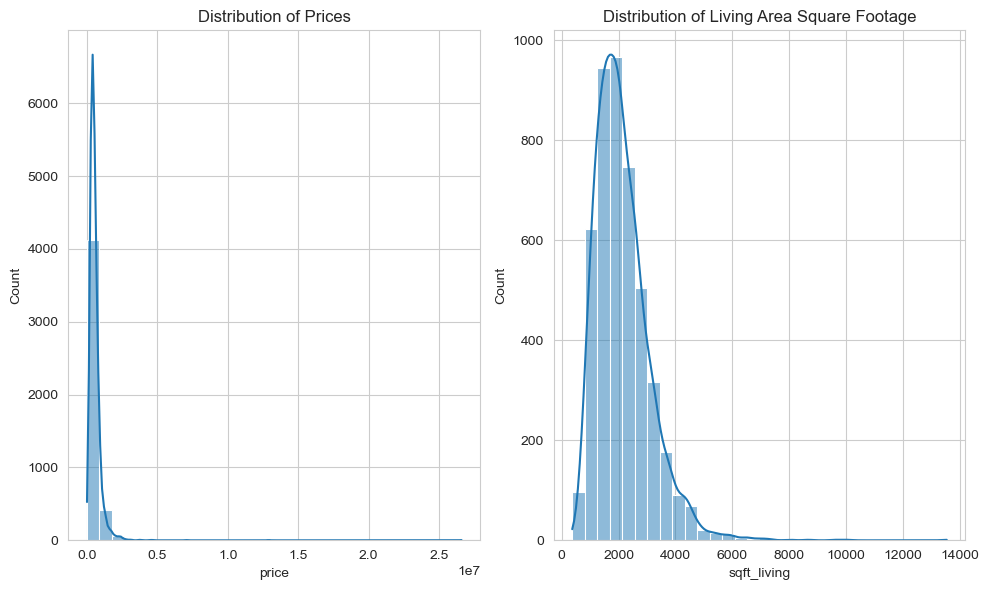

In [30]:
warnings.filterwarnings('ignore')

# Visualization and analysis
data_preprocessed = data.copy()
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Histogram of prices
sns.histplot(data_preprocessed['price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prices')

# Histogram of sqft_living
sns.histplot(data_preprocessed['sqft_living'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Living Area Square Footage')

plt.tight_layout()
plt.show()


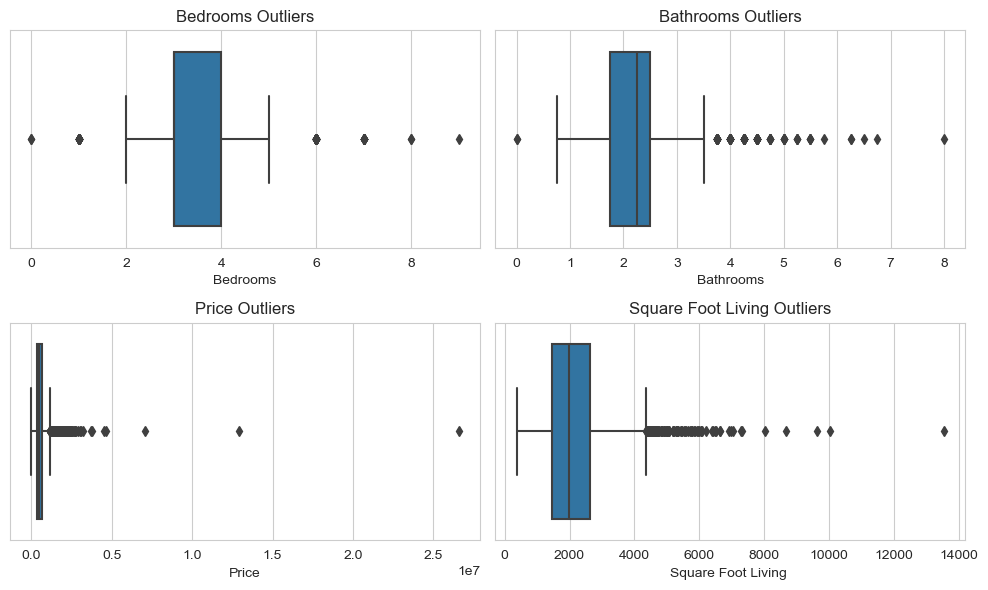

In [67]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Box plot of bedrooms
sns.boxplot(x=data_preprocessed['bedrooms'], ax=axes[0, 0])
axes[0, 0].set_title('Bedrooms Outliers')
axes[0, 0].set_xlabel("Bedrooms")

# Box plot of bathrooms
sns.boxplot(x=data_preprocessed['bathrooms'], ax=axes[0, 1])
axes[0, 1].set_title('Bathrooms Outliers')
axes[0, 1].set_xlabel("Bathrooms")

# Box plot of price
sns.boxplot(x=data_preprocessed['price'], ax=axes[1, 0])
axes[1, 0].set_title('Price Outliers')
axes[1, 0].set_xlabel("Price")

# Box plot of bathrooms
sns.boxplot(x=data_preprocessed['sqft_living'], ax=axes[1, 1])
axes[1, 1].set_title('Square Foot Living Outliers')
axes[1, 1].set_xlabel("Square Foot Living ")

plt.tight_layout()
plt.show()

In [36]:
# Label Encoding
features = ['street','city','statezip']
target_column = 'price'
data_encoded=libs.Feature_Encoding(data, target_column = target_column, features=features, encoding_method='label')


In [37]:
# View encoded data
data_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31


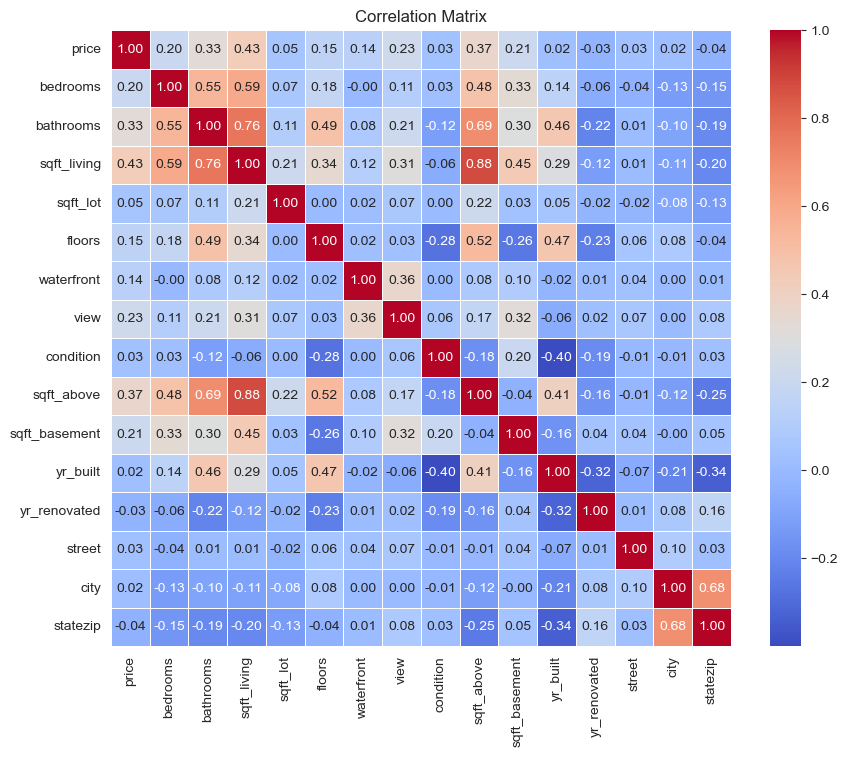

In [43]:
# Coorelation Matrix
libs.plot_correlation(data_encoded)

## Distribution of Prices

The histogram for the distribution of prices shows a right-skewed pattern, with a peak at the lower end of the price range and a long tail extending towards the higher prices. This suggests that while most of the homes are relatively affordable, there are a few homes with significantly higher prices, which are potential outliers. The skewness in the distribution indicates that a transformation, such as a logarithmic transformation, might be beneficial for any modeling efforts to normalize the data and potentially improve model performance.

## Living Area Square Footage

The histogram for the distribution of living area square footage reveals a similar right-skewed distribution. Most of the homes have a smaller living area, with fewer homes having a much larger living area. This skewness aligns with the price distribution, suggesting that larger homes are less common and may be priced higher, which could be an area of interest for further analysis.

## Bedrooms and Bathrooms

The box plots for bedrooms and bathrooms indicate a concentration of homes with 2 to 4 bedrooms and 1 to 3 bathrooms. Outliers are present in both features, but they are more noticeable in the number of bedrooms. These outliers might represent unusually large homes or data entry errors and should be examined further to determine the appropriate treatment for modeling.

## Correlation Matrix

The correlation matrix shows that there are positive correlations between price and features such as square footage of the living area, number of bathrooms, and square footage above ground level. This suggests that these features are important predictors of price. The living area square footage also has strong correlations with the number of bathrooms and bedrooms, which may indicate multicollinearity—a condition that can affect certain types of regression models by inflating the variance of the estimated regression coefficients.

## Recommendations for Feature Engineering and Model Selection

Feature Transformation: Due to the skewness observed in the price and square footage distributions, consider applying a logarithmic transformation to these features to reduce the impact of extreme values.

Handling Outliers: Evaluate the outliers in price, bedrooms, and bathrooms to decide on a strategy—whether to exclude them from the dataset or to cap them at a certain value—to reduce their influence on the model.

Feature Creation: New features could be engineered, such as the age of the property (calculated as the current year minus the year built) and the time since the last renovation (calculated as the current year minus the year renovated, for properties that have undergone renovations). These features could provide additional insights and predictive power.

Model Choice: Given the strong correlations observed between certain features and price, linear regression models could be a good starting point. However, it will be important to check for and address multicollinearity. Tree-based models like decision trees or random forests may be less sensitive to multicollinearity and could also handle the non-linear relationships and feature interactions well.

## Price Distribution and Outliers

The histogram of home prices reveals a pronounced rightward skew, indicating that while the bulk of homes are more modestly priced, a select few boast significantly higher price tags. This is further underscored by the box plot, which showcases a cluster of outliers on the higher end; these are homes whose prices soar well above the norm, potentially representing luxury properties or those with unique features.

## Square Footage Variability

When it comes to living area square footage, we observe a similar right skew. This suggests that the majority of homes feature a living area that would be considered standard or below, while a smaller number of homes offer substantially more space. This characteristic aligns with what we'd anticipate, given that larger homes are less common and tend to be more expensive.

## Bedroom and Bathroom Counts

Moving on to the box plots for bedrooms and bathrooms, we see that most homes fall into a predictable range of 2 to 4 bedrooms and 1 to 3 bathrooms. This range likely reflects the typical family home. However, there are exceptions on both charts—homes that break the mold with significantly higher numbers of bedrooms or bathrooms, hinting at more spacious or perhaps multi-family dwellings.

## Correlation Insights

The correlation heatmap offers a treasure trove of insights, revealing how various features interrelate. Notably, there's a strong positive relationship between price and living area square footage, as well as the number of bathrooms, which suggests that as homes increase in size or amenity count, so too does their market value. The heatmap also points to potential multicollinearity between certain features, such as living area and the number of bathrooms or bedrooms, which is valuable information for any predictive modeling efforts.

## Synthesizing Insights for Action

These visual insights suggest several actions. First, transforming the price and square footage data could help normalize their distributions, enhancing model accuracy. Second, addressing outliers is crucial, either by examining them more closely or potentially excluding them from certain analyses to avoid skewing results. Third, creating new features, such as the age of the property or time since the last renovation, could unveil additional predictive relationships. Lastly, choosing the right model is key—while linear regression is a natural starting point, tree-based models might better capture the complex, nonlinear relationships in our data.

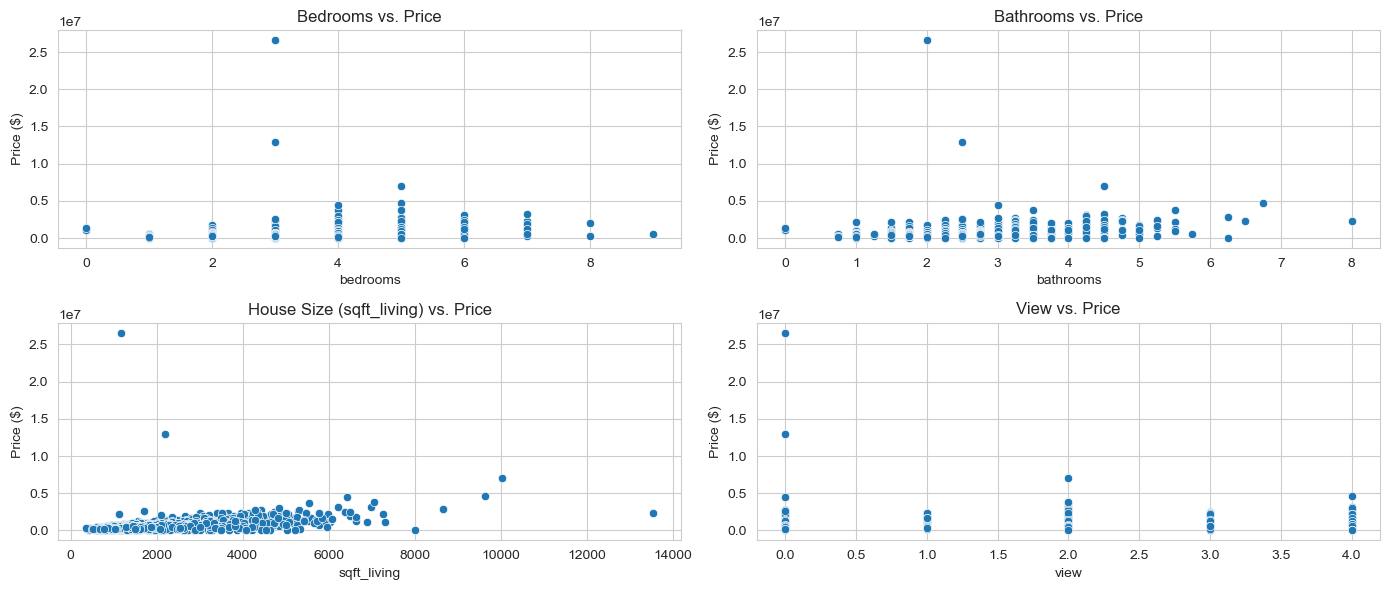

In [62]:
# Setting up the aesthetics for the plots
sns.set_style("whitegrid")

# Creating the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Plotting each comparison
sns.scatterplot(ax=axes[0, 0], data=data, x='bedrooms', y='price').set(title='Bedrooms vs. Price')
sns.scatterplot(ax=axes[0, 1], data=data, x='bathrooms', y='price').set(title='Bathrooms vs. Price')
sns.scatterplot(ax=axes[1, 0], data=data, x='sqft_living', y='price').set(title='House Size (sqft_living) vs. Price')
sns.scatterplot(ax=axes[1, 1], data=data, x='view', y='price').set(title='View vs. Price')

# Setting a shared y-label
for ax in axes.flat:
    ax.set(ylabel='Price ($)')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()



Bedrooms vs. Price: The scatter plot shows a general trend that as the number of bedrooms increases, the price of the property tends to increase. However, there is significant variability in price within each bedroom category, indicating that factors other than just the number of bedrooms affect the price.

Bathrooms vs. Price: Similar to bedrooms, there's a noticeable trend where more bathrooms correlate with higher property prices. The variation in price seems somewhat more pronounced for properties with more bathrooms, suggesting that the number of bathrooms might be a stronger indicator of price compared to the number of bedrooms.

House Size (sqft_living) vs. Price: This comparison shows a more clear and consistent trend. As the size of the house increases (in square feet), the price also tends to increase. The relationship appears to be more linear, suggesting that house size is a significant determinant of property price.

These comparisons provide a good starting point for understanding the relationship between property characteristics and their prices. It's evident that while all three factors are important, the size of the house shows a stronger and more consistent correlation with price. 

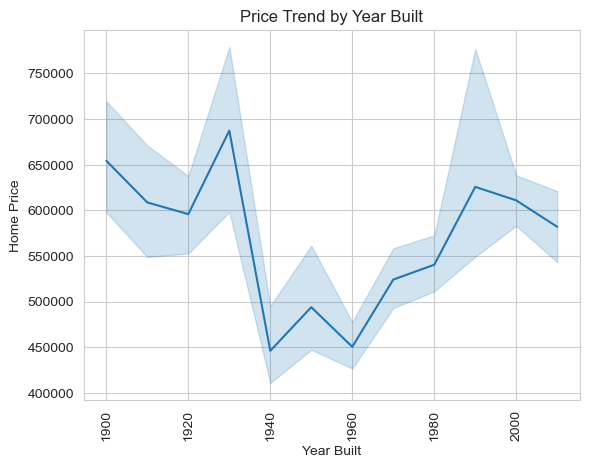

In [55]:
# Barplot with price on the y-axis and decade on the x-axis
sns.lineplot(data=data, x='yr_built', y='price')
plt.xticks(rotation=90) 
plt.title("Price Trend by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Home Price")
plt.show()
